In [1]:
!pip install -qU pandas matplotlib seaborn python-dotenv langchain langchain-core langchain-community langchain-text-splitters langchain-openai langchain-chroma transformers[torch] streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.2/91.2 kB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.3/67.3 kB 6.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 116.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 123.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 441.4/441.4 kB 35.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 94.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.4/70.4 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 114.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.5/19.5 MB 102.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.2/45.2 kB 4.0 MB/s eta 0

In [3]:
import pandas as pd

df = pd.read_csv("/content/text_classification.csv")

In [5]:
df.head(5)

,isbn13,isbn10,title,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count,average_rating_rounded,desc_len,title_and_subtitle,tagged_description,simple_categories
0,9780002005883,0002005883,Gilead,Marilynne Robinson,Fiction,http://books.google.com/books/content?id=KQZCP...,A NOVEL THAT READERS and critics have been eag...,2004.0,3.85,247.0,361.0,3.8,1154,Gilead,9780002005883 A NOVEL THAT READERS and critics...,Fiction
1,9780002261982,0002261987,Spider's Web,Charles Osborne;Agatha Christie,Detective and mystery stories,http://books.google.com/books/content?id=gA5GP...,A new 'Christie for Christmas' -- a full-lengt...,2000.0,3.83,241.0,5164.0,3.8,1200,Spider's Web: A Novel,9780002261982 A new 'Christie for Christmas' -...,Fiction
2,9780006178736,0006178731,Rage of angels,Sidney Sheldon,Fiction,http://books.google.com/books/content?id=FKo2T...,"A memorable, mesmerizing heroine Jennifer -- b...",1993.0,3.93,512.0,29532.0,3.9,359,Rage of angels,"9780006178736 A memorable, mesmerizing heroine...",Fiction
3,9780006280897,0006280897,The Four Loves,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=XhQ5X...,Lewis' work on the nature of love divides love...,2002.0,4.15,170.0,33684.0,4.2,295,The Four Loves,9780006280897 Lewis' work on the nature of lov...,Nonfiction
4,9780006280934,0006280935,The Problem of Pain,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=Kk-uV...,"""In The Problem of Pain, C.S. Lewis, one of th...",2002.0,4.09,176.0,37569.0,4.1,465,The Problem of Pain,"9780006280934 ""In The Problem of Pain, C.S. Le...",Nonfiction


In [4]:
from transformers import pipeline

classifier = pipeline(
    "text-classification",
    model="j-hartmann/emotion-english-distilroberta-base",
    top_k = None
    )

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json: 0.00B [00:00, ?B/s]

pytorch_model.bin:   0%|          | 0.00/329M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/294 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

Device set to use cuda:0


In [6]:
df["description"][0]

'A NOVEL THAT READERS and critics have been eagerly anticipating for over a decade, Gilead is an astonishingly imagined story of remarkable lives. John Ames is a preacher, the son of a preacher and the grandson (both maternal and paternal) of preachers. It’s 1956 in Gilead, Iowa, towards the end of the Reverend Ames’s life, and he is absorbed in recording his family’s story, a legacy for the young son he will never see grow up. Haunted by his grandfather’s presence, John tells of the rift between his grandfather and his father: the elder, an angry visionary who fought for the abolitionist cause, and his son, an ardent pacifist. He is troubled, too, by his prodigal namesake, Jack (John Ames) Boughton, his best friend’s lost son who returns to Gilead searching for forgiveness and redemption. Told in John Ames’s joyous, rambling voice that finds beauty, humour and truth in the smallest of life’s details, Gilead is a song of celebration and acceptance of the best and the worst the world ha

In [7]:
classifier(df["description"][0])

[[{'label': 'fear', 'score': 0.6548413634300232},
  {'label': 'neutral', 'score': 0.16985207796096802},
  {'label': 'sadness', 'score': 0.11640888452529907},
  {'label': 'surprise', 'score': 0.02070062793791294},
  {'label': 'disgust', 'score': 0.019100705161690712},
  {'label': 'joy', 'score': 0.015161297284066677},
  {'label': 'anger', 'score': 0.003935146611183882}]]

## Breaking the paragraph into sentences.
We can also break the pargraph into sentences and get different preidction for each sentences

In [9]:
df["description"][0].split(".")

['A NOVEL THAT READERS and critics have been eagerly anticipating for over a decade, Gilead is an astonishingly imagined story of remarkable lives',
 ' John Ames is a preacher, the son of a preacher and the grandson (both maternal and paternal) of preachers',
 ' It’s 1956 in Gilead, Iowa, towards the end of the Reverend Ames’s life, and he is absorbed in recording his family’s story, a legacy for the young son he will never see grow up',
 ' Haunted by his grandfather’s presence, John tells of the rift between his grandfather and his father: the elder, an angry visionary who fought for the abolitionist cause, and his son, an ardent pacifist',
 ' He is troubled, too, by his prodigal namesake, Jack (John Ames) Boughton, his best friend’s lost son who returns to Gilead searching for forgiveness and redemption',
 ' Told in John Ames’s joyous, rambling voice that finds beauty, humour and truth in the smallest of life’s details, Gilead is a song of celebration and acceptance of the best and t

In [8]:
classifier(df["description"][0].split("."))

[[{'label': 'surprise', 'score': 0.7296026945114136},
  {'label': 'neutral', 'score': 0.1403856873512268},
  {'label': 'fear', 'score': 0.06816219538450241},
  {'label': 'joy', 'score': 0.04794241115450859},
  {'label': 'anger', 'score': 0.009156348183751106},
  {'label': 'disgust', 'score': 0.00262847519479692},
  {'label': 'sadness', 'score': 0.0021221605129539967}],
 [{'label': 'neutral', 'score': 0.44937071204185486},
  {'label': 'disgust', 'score': 0.2735914885997772},
  {'label': 'joy', 'score': 0.10908304899930954},
  {'label': 'sadness', 'score': 0.09362724423408508},
  {'label': 'anger', 'score': 0.040478333830833435},
  {'label': 'surprise', 'score': 0.02697017975151539},
  {'label': 'fear', 'score': 0.006879060063511133}],
 [{'label': 'neutral', 'score': 0.6462162137031555},
  {'label': 'sadness', 'score': 0.2427332103252411},
  {'label': 'disgust', 'score': 0.04342261329293251},
  {'label': 'surprise', 'score': 0.028300540521740913},
  {'label': 'joy', 'score': 0.0142114423

In [10]:
prediction = classifier(df["description"][0].split("."))

In [12]:
prediction

[[{'label': 'surprise', 'score': 0.7296026945114136},
  {'label': 'neutral', 'score': 0.1403856873512268},
  {'label': 'fear', 'score': 0.06816219538450241},
  {'label': 'joy', 'score': 0.04794241115450859},
  {'label': 'anger', 'score': 0.009156348183751106},
  {'label': 'disgust', 'score': 0.00262847519479692},
  {'label': 'sadness', 'score': 0.0021221605129539967}],
 [{'label': 'neutral', 'score': 0.44937071204185486},
  {'label': 'disgust', 'score': 0.2735914885997772},
  {'label': 'joy', 'score': 0.10908304899930954},
  {'label': 'sadness', 'score': 0.09362724423408508},
  {'label': 'anger', 'score': 0.040478333830833435},
  {'label': 'surprise', 'score': 0.02697017975151539},
  {'label': 'fear', 'score': 0.006879060063511133}],
 [{'label': 'neutral', 'score': 0.6462162137031555},
  {'label': 'sadness', 'score': 0.2427332103252411},
  {'label': 'disgust', 'score': 0.04342261329293251},
  {'label': 'surprise', 'score': 0.028300540521740913},
  {'label': 'joy', 'score': 0.0142114423

In [13]:
prediction[0]

[{'label': 'surprise', 'score': 0.7296026945114136},
 {'label': 'neutral', 'score': 0.1403856873512268},
 {'label': 'fear', 'score': 0.06816219538450241},
 {'label': 'joy', 'score': 0.04794241115450859},
 {'label': 'anger', 'score': 0.009156348183751106},
 {'label': 'disgust', 'score': 0.00262847519479692},
 {'label': 'sadness', 'score': 0.0021221605129539967}]

In [11]:
sorted(prediction[0], key=lambda x: x["label"])

[{'label': 'anger', 'score': 0.009156348183751106},
 {'label': 'disgust', 'score': 0.00262847519479692},
 {'label': 'fear', 'score': 0.06816219538450241},
 {'label': 'joy', 'score': 0.04794241115450859},
 {'label': 'neutral', 'score': 0.1403856873512268},
 {'label': 'sadness', 'score': 0.0021221605129539967},
 {'label': 'surprise', 'score': 0.7296026945114136}]

# Idea:

Idea is to break the paragraph into sentences, and then for the 7 emotions get the maximum score out of all the sentences.

Eg: Joy: which is the max score, neutral which is the max score and so on

In this way each paragraph is rich with the sentiment data

Input: predictions is expected to be a list of sentence‐level outputs, where each element is itself a list of { "label": <emotion>, "score": <float> } dicts.

You initialize a fresh per_emotion_scores dict of lists.

You loop over each sentence’s prediction list:

* Sort that list by label (so that the order matches your fixed emotion_labels list).

* Extract the score for each emotion in the emotion_labels order, appending it to the corresponding list in per_emotion_scores.

After you’ve processed all sentences, you take the maximum score for each emotion across all sentences (np.max(scores)).

Output: a dict mapping each emotion to its single highest score for that book’s description.



In [14]:
import numpy as np

emotion_labels = ["anger", "disgust", "fear", "joy", "sadness", "surprise", "neutral"]

isbn = []
emotion_scores = {label: [] for label in emotion_labels}

def calculate_max_emotion_scores(predictions):
    per_emotion_scores = {label: [] for label in emotion_labels}

    for prediction in predictions:
        sorted_predictions = sorted(prediction, key=lambda x: x["label"])

        for index, label in enumerate(emotion_labels):
            per_emotion_scores[label].append(sorted_predictions[index]["score"])

    return {label: np.max(scores) for label, scores in per_emotion_scores.items()}

### Check on first 10 data

In [15]:
for i in range(10):
    isbn.append(df["isbn13"][i])
    sentences = df["description"][i].split(".")

    predictions = classifier(sentences)

    max_scores = calculate_max_emotion_scores(predictions)

    for label in emotion_labels:
        emotion_scores[label].append(max_scores[label])

You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset


In [16]:
emotion_scores

{'anger': [np.float64(0.0641336739063263),
  np.float64(0.6126185059547424),
  np.float64(0.0641336739063263),
  np.float64(0.35148391127586365),
  np.float64(0.08141247183084488),
  np.float64(0.2322249710559845),
  np.float64(0.5381842255592346),
  np.float64(0.0641336739063263),
  np.float64(0.30067017674446106),
  np.float64(0.0641336739063263)],
 'disgust': [np.float64(0.2735914885997772),
  np.float64(0.3482844829559326),
  np.float64(0.10400670021772385),
  np.float64(0.15072263777256012),
  np.float64(0.1844954937696457),
  np.float64(0.727174699306488),
  np.float64(0.15585491061210632),
  np.float64(0.10400670021772385),
  np.float64(0.2794813811779022),
  np.float64(0.1779276728630066)],
 'fear': [np.float64(0.928167998790741),
  np.float64(0.9425278306007385),
  np.float64(0.9723208546638489),
  np.float64(0.36070623993873596),
  np.float64(0.09504325687885284),
  np.float64(0.05136282742023468),
  np.float64(0.7474286556243896),
  np.float64(0.4044959247112274),
  np.float

# Perform on entire dataset

In [17]:
from tqdm import tqdm

emotion_labels = ["anger", "disgust", "fear", "joy", "sadness", "surprise", "neutral"]

isbn = []
emotion_scores = {label: [] for label in emotion_labels}

for i in tqdm(range(len(df))):

    isbn.append(df["isbn13"][i])
    sentences = df["description"][i].split(".")

    predictions = classifier(sentences)
    max_scores = calculate_max_emotion_scores(predictions)

    for label in emotion_labels:
        emotion_scores[label].append(max_scores[label])

100%|██████████| 5197/5197 [02:22<00:00, 36.42it/s]


In [22]:
emotion_scores

{'anger': [np.float64(0.0641336739063263),
  np.float64(0.6126185059547424),
  np.float64(0.0641336739063263),
  np.float64(0.35148391127586365),
  np.float64(0.08141247183084488),
  np.float64(0.2322249710559845),
  np.float64(0.5381842255592346),
  np.float64(0.0641336739063263),
  np.float64(0.30067017674446106),
  np.float64(0.0641336739063263),
  np.float64(0.0641336739063263),
  np.float64(0.6115744113922119),
  np.float64(0.10621520131826401),
  np.float64(0.0641336739063263),
  np.float64(0.07239244878292084),
  np.float64(0.09586354345083237),
  np.float64(0.16215930879116058),
  np.float64(0.0641336739063263),
  np.float64(0.08193845301866531),
  np.float64(0.2234596312046051),
  np.float64(0.1071522980928421),
  np.float64(0.0641336739063263),
  np.float64(0.0641336739063263),
  np.float64(0.0641336739063263),
  np.float64(0.3963673412799835),
  np.float64(0.06472665071487427),
  np.float64(0.0641336739063263),
  np.float64(0.0641336739063263),
  np.float64(0.064133673906326

In [19]:
emotions_df = pd.DataFrame(emotion_scores)
emotions_df["isbn13"] = isbn

In [23]:

emotions_df

,anger,disgust,fear,joy,sadness,surprise,neutral,isbn13
0,0.064134,0.273591,0.928168,0.932797,0.646216,0.967158,0.729603,9780002005883
1,0.612619,0.348284,0.942528,0.704422,0.887939,0.111690,0.252545,9780002261982
2,0.064134,0.104007,0.972321,0.767237,0.549477,0.111690,0.078766,9780006178736
3,0.351484,0.150723,0.360706,0.251881,0.732685,0.111690,0.078766,9780006280897
4,0.081412,0.184495,0.095043,0.040564,0.884390,0.475881,0.078766,9780006280934
...,...,...,...,...,...,...,...,...
5192,0.148208,0.030643,0.919165,0.255170,0.853722,0.980877,0.030656,9788172235222
5193,0.064134,0.114383,0.051363,0.400263,0.883199,0.111690,0.227765,9788173031014
5194,0.009997,0.009929,0.339218,0.947779,0.375755,0.066685,0.057625,9788179921623
5195,0.064134,0.104007,0.459269,0.759455,0.951104,0.368111,0.078766,9788185300535


# Visualize

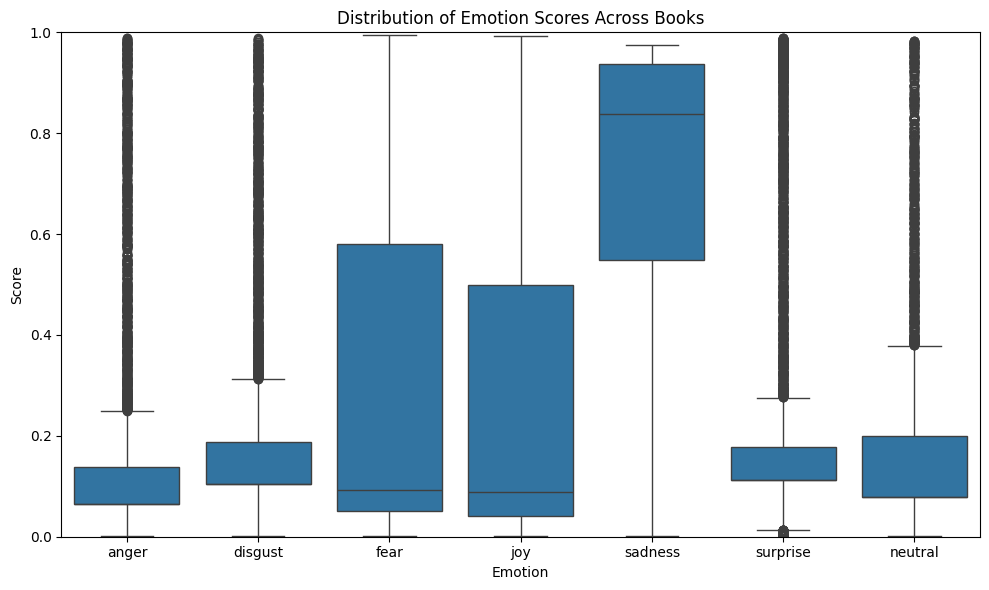

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# assume emotions_df already exists with columns:
# ['anger','disgust','fear','joy','sadness','surprise','neutral','isbn13']

# 1) Melt to long form
emotions_long = emotions_df.melt(
    id_vars="isbn13",
    value_vars=["anger","disgust","fear","joy","sadness","surprise","neutral"],
    var_name="emotion",
    value_name="score"
)

# 2) Draw boxplots
plt.figure(figsize=(10, 6))
sns.boxplot(x="emotion", y="score", data=emotions_long)
plt.title("Distribution of Emotion Scores Across Books")
plt.xlabel("Emotion")
plt.ylabel("Score")
plt.ylim(0, 1)  # since these are probabilities/scores
plt.tight_layout()
plt.show()


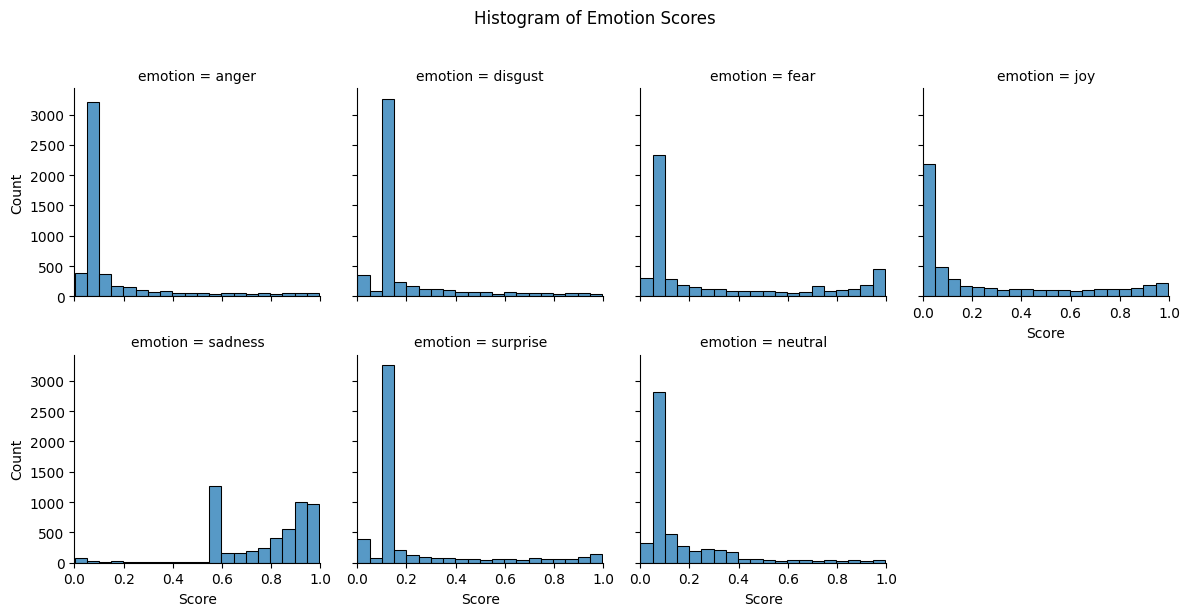

In [25]:
import seaborn as sns

# Re‐use the same `emotions_long` from above

# 1) Create a grid of small histograms
g = sns.displot(
    data=emotions_long,
    x="score",
    col="emotion",
    col_wrap=4,
    kind="hist",
    binwidth=0.05,
    height=3,
    facet_kws=dict(margin_titles=True)
)

# 2) Tidy up
g.set_axis_labels("Score", "Count")
g.set(xlim=(0,1))
g.fig.suptitle("Histogram of Emotion Scores", y=1.02)
plt.tight_layout()
plt.show()


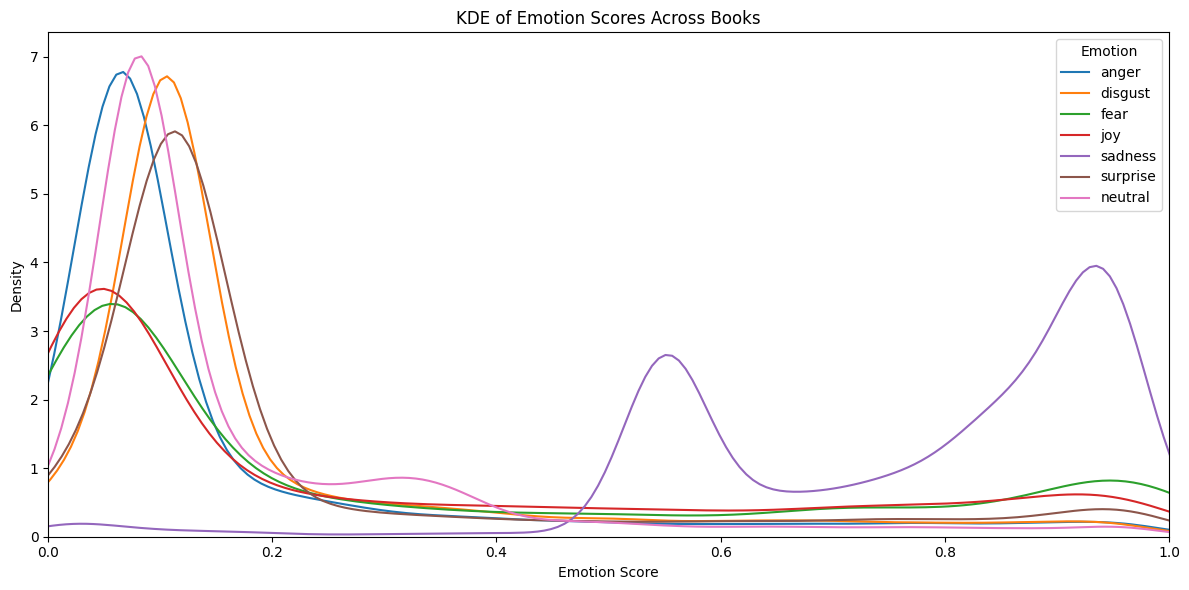

In [26]:
# Define labels
emotion_labels = ["anger", "disgust", "fear", "joy", "sadness", "surprise", "neutral"]

# 2. Melt to long form
emotions_long = emotions_df.melt(
    id_vars="isbn13",
    value_vars=emotion_labels,
    var_name="emotion",
    value_name="score"
)

# 3. Overlaid KDE plot for all emotions
plt.figure(figsize=(12, 6))
for emotion in emotion_labels:
    sns.kdeplot(
        data=emotions_long[emotions_long["emotion"] == emotion]["score"],
        label=emotion,
        fill=False,
        common_norm=False,
        bw_adjust=1
    )
plt.title("KDE of Emotion Scores Across Books")
plt.xlabel("Emotion Score")
plt.ylabel("Density")
plt.xlim(0, 1)
plt.legend(title="Emotion")
plt.tight_layout()
plt.show()

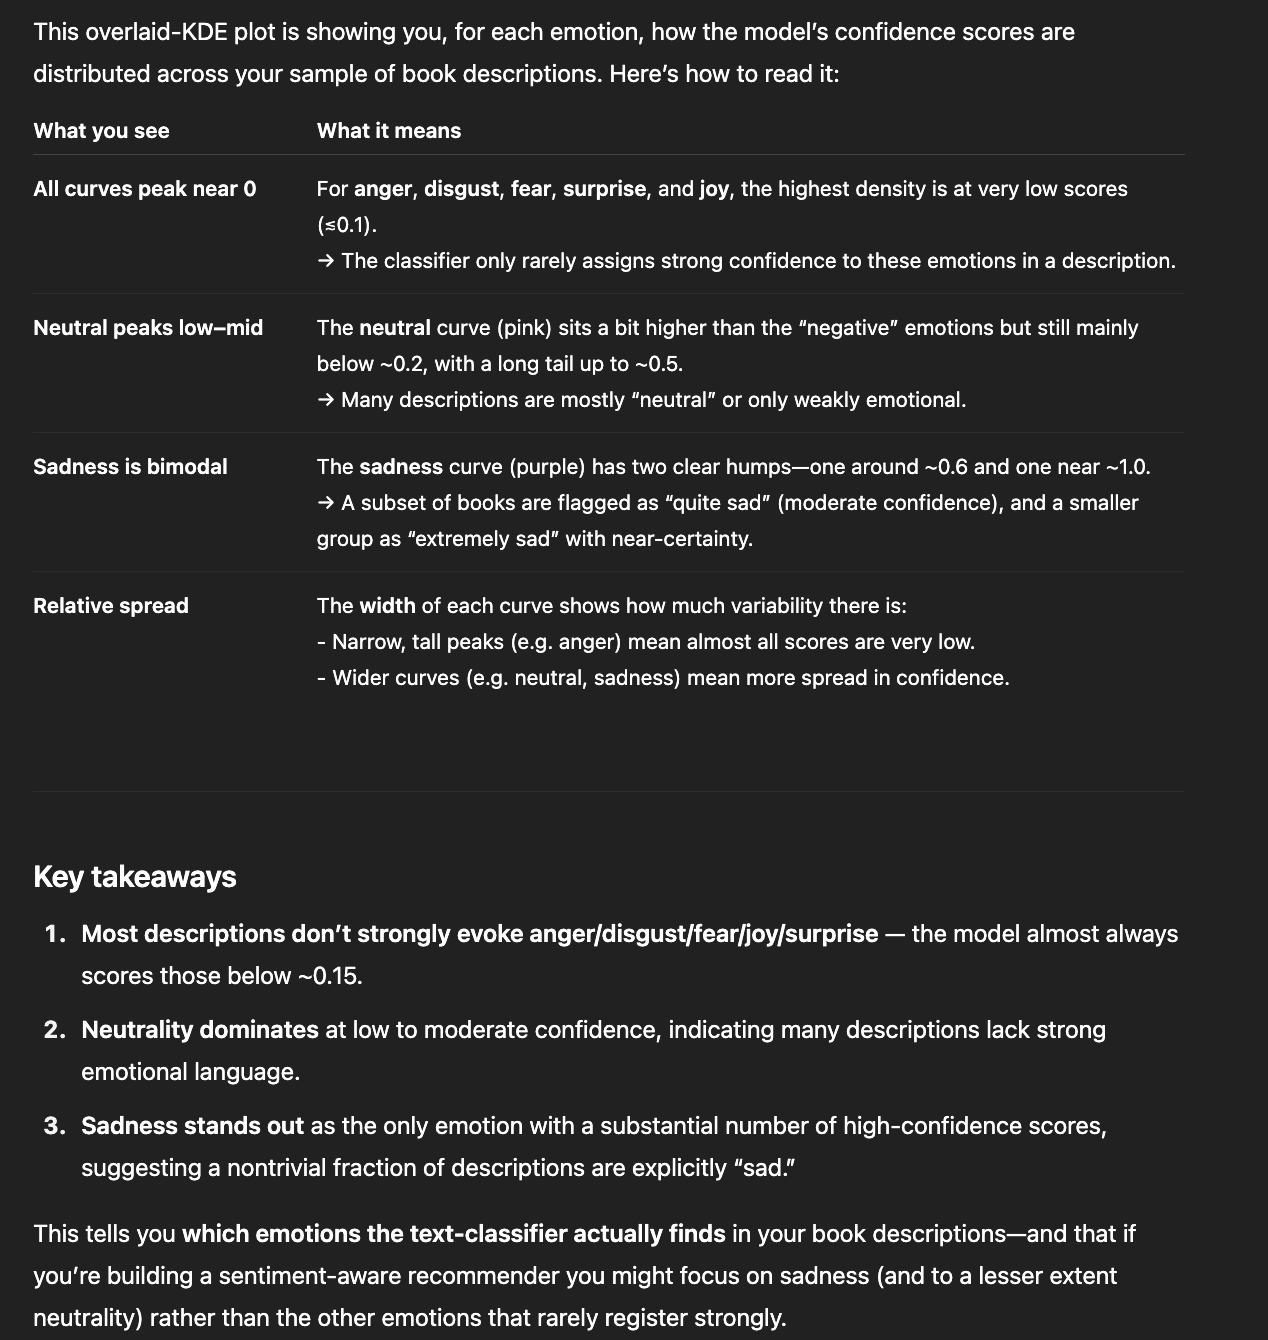

# Merge and save the dataset

In [28]:
df = pd.merge(df, emotions_df, on = "isbn13")

In [29]:
df

,isbn13,isbn10,title,authors,categories,thumbnail,description,published_year,average_rating,num_pages,...,title_and_subtitle,tagged_description,simple_categories,anger,disgust,fear,joy,sadness,surprise,neutral
0,9780002005883,0002005883,Gilead,Marilynne Robinson,Fiction,http://books.google.com/books/content?id=KQZCP...,A NOVEL THAT READERS and critics have been eag...,2004.0,3.85,247.0,...,Gilead,9780002005883 A NOVEL THAT READERS and critics...,Fiction,0.064134,0.273591,0.928168,0.932797,0.646216,0.967158,0.729603
1,9780002261982,0002261987,Spider's Web,Charles Osborne;Agatha Christie,Detective and mystery stories,http://books.google.com/books/content?id=gA5GP...,A new 'Christie for Christmas' -- a full-lengt...,2000.0,3.83,241.0,...,Spider's Web: A Novel,9780002261982 A new 'Christie for Christmas' -...,Fiction,0.612619,0.348284,0.942528,0.704422,0.887939,0.111690,0.252545
2,9780006178736,0006178731,Rage of angels,Sidney Sheldon,Fiction,http://books.google.com/books/content?id=FKo2T...,"A memorable, mesmerizing heroine Jennifer -- b...",1993.0,3.93,512.0,...,Rage of angels,"9780006178736 A memorable, mesmerizing heroine...",Fiction,0.064134,0.104007,0.972321,0.767237,0.549477,0.111690,0.078766
3,9780006280897,0006280897,The Four Loves,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=XhQ5X...,Lewis' work on the nature of love divides love...,2002.0,4.15,170.0,...,The Four Loves,9780006280897 Lewis' work on the nature of lov...,Nonfiction,0.351484,0.150723,0.360706,0.251881,0.732685,0.111690,0.078766
4,9780006280934,0006280935,The Problem of Pain,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=Kk-uV...,"""In The Problem of Pain, C.S. Lewis, one of th...",2002.0,4.09,176.0,...,The Problem of Pain,"9780006280934 ""In The Problem of Pain, C.S. Le...",Nonfiction,0.081412,0.184495,0.095043,0.040564,0.884390,0.475881,0.078766
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5192,9788172235222,8172235224,Mistaken Identity,Nayantara Sahgal,Indic fiction (English),http://books.google.com/books/content?id=q-tKP...,On A Train Journey Home To North India After L...,2003.0,2.93,324.0,...,Mistaken Identity,9788172235222 On A Train Journey Home To North...,Fiction,0.148208,0.030643,0.919165,0.255170,0.853722,0.980877,0.030656
5193,9788173031014,8173031010,Journey to the East,Hermann Hesse,Adventure stories,http://books.google.com/books/content?id=rq6JP...,This book tells the tale of a man who goes on ...,2002.0,3.70,175.0,...,Journey to the East,9788173031014 This book tells the tale of a ma...,Nonfiction,0.064134,0.114383,0.051363,0.400263,0.883199,0.111690,0.227765
5194,9788179921623,817992162X,The Monk Who Sold His Ferrari: A Fable About F...,Robin Sharma,Health & Fitness,http://books.google.com/books/content?id=c_7mf...,"Wisdom to Create a Life of Passion, Purpose, a...",2003.0,3.82,198.0,...,The Monk Who Sold His Ferrari: A Fable About F...,9788179921623 Wisdom to Create a Life of Passi...,Fiction,0.009997,0.009929,0.339218,0.947779,0.375755,0.066685,0.057625
5195,9788185300535,8185300534,I Am that,Sri Nisargadatta Maharaj;Sudhakar S. Dikshit,Philosophy,http://books.google.com/books/content?id=Fv_JP...,This collection of the timeless teachings of o...,1999.0,4.51,531.0,...,I Am that: Talks with Sri Nisargadatta Maharaj,9788185300535 This collection of the timeless ...,Nonfiction,0.064134,0.104007,0.459269,0.759455,0.951104,0.368111,0.078766


In [30]:
df.to_csv("books_with_emotions.csv", index = False)